In [2]:
import os
import pathlib
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def load_image(image_file):
    image = tf.io.read_file(image_file)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (200,200))
    return image

def get_data_batch(file_dir):
    dataset=[file_dir+"/"+f for f in os.listdir(file_dir)]

    data = list()
    for x in dataset:
        data.append(load_image(x))
    data = np.array(data)
    data.astype('float32')
    data = data / 255.0

    # data = data.reshape((len(data), np.prod(data.shape[1:])))
    return data


In [4]:
photo_train_dir = "CUHK Dataset/CUHK_training_cropped_photos"
sketch_train_dir = "CUHK Dataset/CUHK_training_cropped_sketches"

photos = get_data_batch(photo_train_dir)
sketches = get_data_batch(sketch_train_dir)
print(photos.shape)
print(sketches.shape)

(88, 200, 200, 3)
(88, 200, 200, 3)


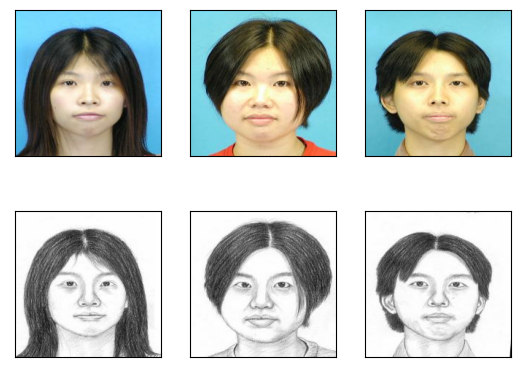

In [5]:

n = 3  # How many digits we will display
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(photos[i].reshape(200, 200, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(sketches[i].reshape(200, 200, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [12]:
photos1 = photos.reshape(len(photos), np.prod(photos.shape[1:]))
sketches1 = sketches.reshape(len(sketches), np.prod(sketches.shape[1:]))

model_dnn = tf.keras.Sequential([
    tf.keras.Input(shape=(120000,)),
    tf.keras.layers.Dense(4096, activation=tf.nn.relu),
    # tf.keras.layers.Dense(2048, activation=tf.nn.relu),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    # tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    # tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    # tf.keras.layers.Dense(32, activation=tf.nn.relu),
    # tf.keras.layers.Dense(64, activation=tf.nn.relu),
    # tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    # tf.keras.layers.Dense(2048, activation=tf.nn.relu),
    tf.keras.layers.Dense(4096, activation=tf.nn.relu),
    tf.keras.layers.Dense(120000, activation=tf.nn.sigmoid)
])

model_dnn.compile(optimizer="adam",
              loss="binary_crossentropy")

model_dnn.fit(
    photos1[:88],
    sketches1[:88],
    batch_size = 11,
    epochs = 25,
    shuffle=True,
    # validation_data=(photos1[68:], sketches1[68:]),
    verbose=1
)

model_dnn.summary()

Epoch 1/25
6/6 [==============================] - 236s 38s/step - loss: 0.6386
Epoch 2/25
6/6 [==============================] - 219s 36s/step - loss: 0.4714
Epoch 3/25
1/6 [====>.........................] - ETA: 3:30 - loss: 0.4038

KeyboardInterrupt: 

3/3 [==============================] - 1s 206ms/step
(88, 120000)


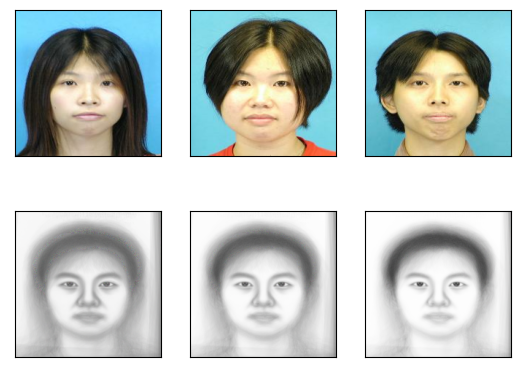

In [10]:
new_sketches = model_dnn.predict(photos1)
print(new_sketches.shape)
for i in range(3):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(photos[i].reshape(200, 200, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, n + i + 1)
    plt.imshow(new_sketches[i].reshape(200, 200, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [ ]:
model_cnn = tf.keras.Sequential([
    tf.keras.Input(shape=(200,200,3)),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D((2, 2), padding="same"),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D((2, 2), padding="same"),
    # tf.keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    # tf.keras.layers.MaxPooling2D((2, 2), padding="same"),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D((2, 2), padding="same"),
    # tf.keras.layers.Conv2D(16, (3, 3), activation="relu", padding="same"),
    # tf.keras.layers.MaxPooling2D((2, 2), padding="same"),
    # tf.keras.layers.Conv2D(16, (3, 3), activation="relu", padding="same"),
    # tf.keras.layers.MaxPooling2D((2,2), padding="same"),
    # tf.keras.layers.Conv2D(8, 3, activation="relu", padding="same"),
    # tf.keras.layers.MaxPool2D(2, padding="same"),
    # tf.keras.layers.Conv2D(8, (3,3), activation="relu", padding="same"),
    # tf.keras.layers.MaxPool2D((2,2), padding="same"),
    #
    #
    # tf.keras.layers.Conv2D(8, 3, activation="relu", padding="same"),
    # tf.keras.layers.UpSampling2D(2),
    # tf.keras.layers.Conv2D(8, (3,3), activation="relu", padding="same"),
    # tf.keras.layers.UpSampling2D((2,2)),
    # tf.keras.layers.Conv2D(16, (3, 3), activation="relu", padding="same"),
    # tf.keras.layers.UpSampling2D((2, 2)),
    # tf.keras.layers.Conv2D(16, (3, 3), activation="relu", padding="same"),
    # tf.keras.layers.UpSampling2D((2, 2)),
     tf.keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    tf.keras.layers.UpSampling2D((2, 2)),
    # tf.keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    # tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu", padding='same'),
    tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")
])

model_cnn.compile(optimizer="adam",
              loss="binary_crossentropy")

model_cnn.fit(
    photos[:68],
    sketches[:68],
    batch_size = 15,
    epochs = 50,
    shuffle=True,
    validation_data=(photos[68:], sketches[68:]),
    verbose=1
)

In [ ]:
new_sketches = model_cnn.predict(photos)
print(new_sketches.shape)
for i in range(3):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(photos[i].reshape(200, 200, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, n + i + 1)
    plt.imshow(new_sketches[i].reshape(200, 200, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)